In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
features_train = pd.read_csv('features_train.csv')
features_train.shape
classes_train = pd.read_csv('classes_train.csv')
classes_train.shape

(2400, 1)

In [3]:
features_train_new = features_train.copy()
features_train_new['is_bot'] = pd.Series(classes_train['is_bot'], index = features_train_new.index)

features_train_new.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,...,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73,0
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,...,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142,0
2,704,3108,454,2400,77,0,0,0,1358,0.518409,...,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90,0
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,...,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51,0
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,...,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106,0


In [4]:
features_train_new.count()

statuses_count                     2400
followers_count                    2400
friends_count                      2400
favourites_count                   2400
listed_count                       2400
is_default_profile                 2400
is_profile_use_background_image    2400
is_verified                        2400
user_age                           2400
tweets_freq                        2400
followers_growth_rate              2400
friends_growth_rate                2400
favourites_growth_rate             2400
listed_growth_rate                 2400
followers_friends_ratio            2400
screen_name_length                 2400
num_digits_in_screen_name          2400
length_of_name                     2400
num_digits_in_name                 2400
description_length                 2400
is_bot                             2400
dtype: int64

<AxesSubplot:>

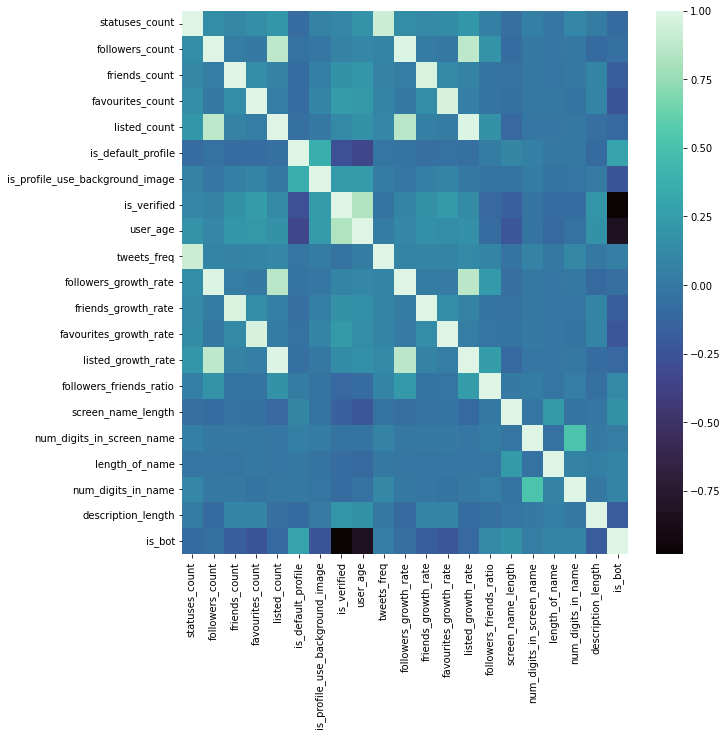

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(features_train_new.corr(), cmap = "mako")

In [6]:
X = features_train_new.drop('is_bot', axis = 1)
Y = features_train_new.is_bot
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# 1.1 Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

F-мера average =
binary - результаты только для класса, указанного параметром pos_label
micro - глобально, подсчитывая общее количество истинных срабатываний, ложноотрицательных и ложноположительных результатов
macro - для каждой метки, находит их невзвешенное среднее значение
weighted - для каждой метки, находит их взвешенное среднее значение

In [27]:
import numpy as np
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

In [8]:
F_measure = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }

In [9]:
Log = LogisticRegression()
scaler = StandardScaler()

X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

F_measure['LogisticRegression'] = f1_score(Y_test, Y_Log, average = "weighted")

In [10]:
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

F_measure['KNeighborsClassifier'] = f1_score(Y_test, Y_KNN, average = "weighted")

In [11]:
DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

F_measure['DecisionTreeClassifier'] = f1_score(Y_test, Y_DTC, average = "weighted")

In [12]:
RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

F_measure['RandomForestClassifier'] = f1_score(Y_test, Y_RFC, average = "weighted")

In [13]:
maxim = -1
for i, j in F_measure.items():
    print ('Model:', i, ' F_measure:', j)
    if j > maxim:
        maxim = j
        model_max = i
        
print ('Best model:', model_max, ' F_measure:', maxim)

Model: LogisticRegression  F_measure: 0.9979196625091709
Model: KNeighborsClassifier  F_measure: 0.9684173873586913
Model: DecisionTreeClassifier  F_measure: 0.9958333333333333
Model: RandomForestClassifier  F_measure: 0.9979136288232552
Best model: LogisticRegression  F_measure: 0.9979196625091709


In [14]:
joblib.dump(model_Log, 'best_model-1.1.pkl')
best_model = model_Log

# 2.1. Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего множества.

# Описание набора признаков
# Признаки, взятые непосредственно из профиля пользователя

Название признака 	Описание 

statuses_count 	Количество твитов пользователя

followers_count 	Количество подписчиков пользователя 

friends_count 	Количество подписок пользователя 

favourites_count 	Количество твитов в разделе понравившихся 

listed_count 	Количество твитов в разделе закрепленных твитов 

is_default_profile 	Использует ли профиль изображение по умолчанию 

is_verified 	Верифицирован ли данный аккаунт 

is_profile_use_background_image 	Использует ли аккаунт фоновое изображение для своей страницы 

# Подсчитанные признаки 

Название признака 	Описание 

user_age 	Время существования аккаунта в днях 

tweet_freq 	Отношения числа твиттов к времени существования аккаунта 

followers_growth_rate 	Отношение числа подписчиков к времени существования аккаунта 

friends_growth_rate 	Отношение числа подписок к времени существования аккаунта 

favourites_growth_rate 	Отношение числа понравившихся твиттов к времени существования аккаунта 

listed_growth_rate 	Отношение числа твиттов из раздела закрепленных к времени существования аккаунта 

followers_friends_ratio 	Отношение числа подписок к числу подписчиков 

screen_name_length 	Длина ника пользователя 

num_digits_in_screen_name 	Количество цифр в нике пользователя 

length_of_name 	Длина имени пользователя 

num_digits_in_name 	Количество цифр в имени пользователя 

description_length 	Длина описания аккаунта пользователя 


In [15]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [16]:
features_train = pd.read_csv('features_train.csv')
classes_train = pd.read_csv('classes_train.csv')
features_train_new = features_train.copy()
features_train_new['is_bot'] = pd.Series(classes_train['is_bot'], index = features_train_new.index)
X = features_train_new.drop('is_bot', axis = 1)
Y = features_train_new.is_bot
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((1920, 20), (480, 20))

In [17]:
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

In [18]:
best_model.fit(X_train_M, Y_train)
pred_train = best_model.predict(X_train_M)
pred_test = best_model.predict(X_test_M)

    importance                        attribute
7     0.384192                      is_verified
4     0.057691                     listed_count
13    0.056920               listed_growth_rate
8     0.045783                         user_age
12    0.029515           favourites_growth_rate
11    0.028347              friends_growth_rate
2     0.027594                    friends_count
3     0.027539                 favourites_count
1     0.015944                  followers_count
10    0.014833            followers_growth_rate
16    0.006038        num_digits_in_screen_name
9     0.005049                      tweets_freq
6     0.004217  is_profile_use_background_image
5     0.004120               is_default_profile
14    0.003185          followers_friends_ratio
17    0.002368                   length_of_name
18    0.001434               num_digits_in_name
15    0.000598               screen_name_length
19    0.000416               description_length
0     0.000253                   statuse

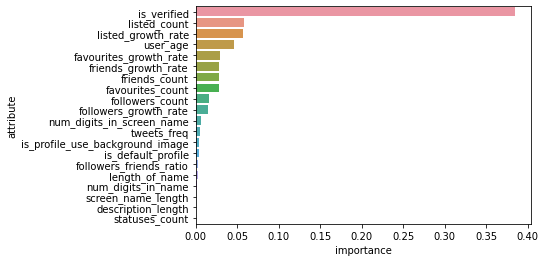

In [19]:
model_regress = LinearRegression()
model_regress.fit(X_train_M, Y_train)
pred_train = model_regress.predict(X_train_M)
pred_test = model_regress.predict(X_test_M)
attribute = X_train.columns.values
importance = abs(model_regress.coef_)
list1 = pd.DataFrame(data = {'importance': importance, 'attribute': X_train.columns, }).sort_values(by = 'importance')
list2 = list1.sort_values(by='importance', ascending=False)
sns.barplot(data = list2, y = 'attribute', x = 'importance')
print(list2)

In [20]:
df_best = features_train_new.drop(columns = ['num_digits_in_screen_name', 
                           'tweets_freq', 
                            'is_profile_use_background_image', 
                            'is_default_profile',
                            'followers_friends_ratio', 
                            'length_of_name',
                            'num_digits_in_name', 
                            'screen_name_length', 
                            'description_length',
                            'statuses_count'])

df_best.head()

,followers_count,friends_count,favourites_count,listed_count,is_verified,user_age,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,is_bot
0,6641,3074,13768,126,1,2711,2.449650,1.133899,5.078569,0.046477,0
1,8465,1575,4561,191,1,4424,1.913427,0.356013,1.030967,0.043174,0
2,3108,454,2400,77,0,1358,2.288660,0.334315,1.767305,0.056701,0
3,304528,526,599,1515,1,4214,72.265781,0.124822,0.142145,0.359516,0
4,13693,204,1177,452,1,3200,4.279063,0.063750,0.367812,0.141250,0


In [22]:
X_best = df_best.drop('is_bot', axis = 1)
Y_best = df_best.is_bot
X_train_best, X_test_best, Y_train_best, Y_test_best = train_test_split(X_best, Y_best, test_size = 0.2, random_state = 42)

In [ ]:
X_train_M = scaler.fit_transform(X_train_best)
X_test_M = scaler.transform(X_test_best)

best_model.fit(X_train_M, Y_train_best)
Y_Log = best_model.predict(X_test_M)

print ('Best model F_measure:', f1_score(Y_test_best, Y_Log, average = "weighted"),'accuracy: ', accuracy_score(Y_test_best, Y_Log))

In [ ]:
joblib.dump(best_model, 'best_model-2.1.pkl')

# 2.2.	Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения. 

В теории при точности 0.9958333333333333 мы имеем вероятность пропуска бота уже ниже 0.03

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
X_train_M = scaler.fit_transform(X_train_best)
X_test_M = scaler.transform(X_test_best)
best_model.fit(X_train_M, Y_train_best)
Y_Log = best_model.predict(X_test_M)

In [ ]:
conf_mat = confusion_matrix(Y_test_best, Y_Log)
num_classes = 2
FP_val = []
for i in range(num_classes):
    FP_val.append(sum(conf_mat[:,i]) - conf_mat[i,i])
FP = sum(FP_val)
    
FN_val = []
for i in range(num_classes):
    FN_val.append(sum(conf_mat[i,:]) - conf_mat[i,i])
FN = (sum(FN_val))

Error = FP / Y_test_best.shape[0] +  FN / Y_test_best.shape[0]

In [ ]:
Error

Best model F_measure: 0.9958333333333333 accuracy:  0.9958333333333333


In [24]:
joblib.dump(best_model, 'best_model-2.1.pkl')

['best_model-2.1.pkl']

# 2.2.	Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения. 

В теории при точности 0.9958333333333333 мы имеем вероятность пропуска бота уже ниже 0.03

In [31]:
from sklearn.metrics import confusion_matrix

In [34]:
X_train_M = scaler.fit_transform(X_train_best)
X_test_M = scaler.transform(X_test_best)
best_model.fit(X_train_M, Y_train_best)
Y_Log = best_model.predict(X_test_M)

In [38]:
conf_mat = confusion_matrix(Y_test_best, Y_Log)
num_classes = 2
FP_val = []
for i in range(num_classes):
    FP_val.append(sum(conf_mat[:,i]) - conf_mat[i,i])
FP = sum(FP_val)
    
FN_val = []
for i in range(num_classes):
    FN_val.append(sum(conf_mat[i,:]) - conf_mat[i,i])
FN = (sum(FN_val))

Error = FP / Y_test_best.shape[0] +  FN / Y_test_best.shape[0]

In [39]:
Error

0.008333333333333333